# Mitochondria voxel and count analysis of Layer 2/3 volume
This notebook will return mitochondria segmentation data for cells in the cell subtype table.  
The vascular cells have been removed.  
Refer to the notebook *mito_voxel analysis_entire_table* to include vascular cells and partial cells.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import scipy as stat

In [2]:
# this csv file is 261 MB and too large to place on Github
# in order to run this notebook, you must first download the file and place on your local machine in the /data folder
# the csv file is available here: https://zenodo.org/record/5579388/files/211019_mitochondria_info.csv

mito = pd.read_csv("211019_mitochondria_info.csv")

In [3]:
mito

,mito_id,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,bbox_end_z_vx,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm
0,3384540,5916,103764,47040,103,103734,47016,102,103798,47066,107,648518346348124201,371475.12,168403.20,4120
1,2526419,1075376,87582,60964,1435,87204,59752,1215,87992,62504,1609,648518346346303282,313543.56,218251.12,57400
2,1379480,483500,65740,73550,392,65556,73322,292,65976,73880,509,648518346341355778,235349.20,263309.00,15680
3,3380073,23140,103750,46904,176,103704,46862,173,103812,46946,181,648518346348124771,371425.00,167916.32,7040
4,1783610,11996,75124,43042,2100,75088,43008,2097,75164,43086,2103,648518346342925287,268943.92,154090.36,84000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409611,2864896,3878784,93134,59860,836,93000,59406,798,93294,60294,867,648518346349536888,333419.72,214298.80,33440
2409612,2161774,4075748,80312,56522,1814,79536,55348,1714,80940,57054,1889,648518346349524070,287516.96,202348.76,72560
2409613,2753701,4576444,90324,60436,2037,89490,60120,1851,90750,61138,2142,648518346341354380,323359.92,216360.88,81480
2409614,1963708,5805612,75674,72546,744,75266,71628,670,76032,73302,795,648518346343047176,270912.92,259714.68,29760


In [4]:
# this is a dataframe from "220309_cell_type_classification.csv"
    # the original csv file is available here: https://www.microns-explorer.org/phase1

celltype = pd.read_csv("220309_cell_type_classification.csv")

In [5]:
celltype

,Unnamed: 0,centroid_x,centroid_y,centroid_z,cell_segid,cell_type,cell_subtype
0,1,41760,60256,1702,648518346349538237,pyramidal,pyramidal cell
1,2,98128,39856,218,648518346349536816,pyramidal,pyramidal cell
2,3,51248,50608,86,648518346349539797,pyramidal,pyramidal cell
3,5,115392,47136,617,648518346349536744,pyramidal,pyramidal cell
4,6,104928,72496,1448,648518346349536851,pyramidal,pyramidal cell
...,...,...,...,...,...,...,...
614,68,107312,43552,2160,648518346349375478,vasculature,endothelial
615,69,104752,40768,878,648518346349061101,vasculature,endothelial
616,70,104464,40784,1867,648518346349375478,vasculature,endothelial
617,71,97377,38012,1145,648518346349375478,vasculature,endothelial


In [6]:
celltype.rename(columns={'cell_segid':'cellid'}, inplace=True)

In [7]:
celltype

,Unnamed: 0,centroid_x,centroid_y,centroid_z,cellid,cell_type,cell_subtype
0,1,41760,60256,1702,648518346349538237,pyramidal,pyramidal cell
1,2,98128,39856,218,648518346349536816,pyramidal,pyramidal cell
2,3,51248,50608,86,648518346349539797,pyramidal,pyramidal cell
3,5,115392,47136,617,648518346349536744,pyramidal,pyramidal cell
4,6,104928,72496,1448,648518346349536851,pyramidal,pyramidal cell
...,...,...,...,...,...,...,...
614,68,107312,43552,2160,648518346349375478,vasculature,endothelial
615,69,104752,40768,878,648518346349061101,vasculature,endothelial
616,70,104464,40784,1867,648518346349375478,vasculature,endothelial
617,71,97377,38012,1145,648518346349375478,vasculature,endothelial


In [8]:
mitocelltype = pd.merge(mito, celltype, how='inner', on = 'cellid')

In [9]:
mitocelltype

,mito_id,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,...,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm,Unnamed: 0,centroid_x,centroid_y,centroid_z,cell_type,cell_subtype
0,1783325,527936,75186,43844,1430,74824,43668,1323,75472,44120,...,648518346349523993,269165.88,156961.52,57200,479,70864,42368,24,pyramidal,pyramidal cell
1,1780086,1597632,75086,43678,1032,74168,43342,675,76458,44298,...,648518346349523993,268807.88,156367.24,41280,479,70864,42368,24,pyramidal,pyramidal cell
2,2026719,141924,79378,47892,742,79192,47734,738,79532,48034,...,648518346349523993,284173.24,171453.36,29680,479,70864,42368,24,pyramidal,pyramidal cell
3,1540216,2780,69738,42838,21,69708,42816,21,69770,42862,...,648518346349523993,249662.04,153360.04,840,479,70864,42368,24,pyramidal,pyramidal cell
4,1547760,211468,70706,45080,1364,70248,44874,1328,71030,45284,...,648518346349523993,253127.48,161386.40,54560,479,70864,42368,24,pyramidal,pyramidal cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076402,345546,95312,48104,48644,2152,48034,48552,2148,48246,48758,...,648518346344456391,172212.32,174145.52,86080,14,48490,49495,2166,vasculature,endothelial
1076403,1271860,6844,63736,74064,319,63702,74036,314,63770,74088,...,648518346341763956,228174.88,265149.12,12760,16,64050,74954,324,vasculature,endothelial
1076404,1272569,9564,64538,73988,327,64490,73968,323,64588,74018,...,648518346341763956,231046.04,264877.04,13080,16,64050,74954,324,vasculature,endothelial
1076405,1272709,22840,64688,74020,327,64632,73992,324,64744,74048,...,648518346341763956,231583.04,264991.60,13080,16,64050,74954,324,vasculature,endothelial


In [10]:
# remove vasculature
mito_novasc1 = mitocelltype[mitocelltype["cell_type"] != "vasculature"]

In [11]:
mito_novasc1

,mito_id,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,...,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm,Unnamed: 0,centroid_x,centroid_y,centroid_z,cell_type,cell_subtype
0,1783325,527936,75186,43844,1430,74824,43668,1323,75472,44120,...,648518346349523993,269165.88,156961.52,57200,479,70864,42368,24,pyramidal,pyramidal cell
1,1780086,1597632,75086,43678,1032,74168,43342,675,76458,44298,...,648518346349523993,268807.88,156367.24,41280,479,70864,42368,24,pyramidal,pyramidal cell
2,2026719,141924,79378,47892,742,79192,47734,738,79532,48034,...,648518346349523993,284173.24,171453.36,29680,479,70864,42368,24,pyramidal,pyramidal cell
3,1540216,2780,69738,42838,21,69708,42816,21,69770,42862,...,648518346349523993,249662.04,153360.04,840,479,70864,42368,24,pyramidal,pyramidal cell
4,1547760,211468,70706,45080,1364,70248,44874,1328,71030,45284,...,648518346349523993,253127.48,161386.40,54560,479,70864,42368,24,pyramidal,pyramidal cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076278,4176104,342336,116544,48642,2096,116196,48326,2068,117242,48952,...,648518346348199802,417227.52,174138.36,83840,77,117776,48992,2098,glia,unknown_type
1076279,4181762,387136,117666,50020,2083,117426,49920,2077,117964,50122,...,648518346348199802,421244.28,179071.60,83320,77,117776,48992,2098,glia,unknown_type
1076280,4181925,488996,117786,50012,2096,117604,49896,2081,118054,50152,...,648518346348199802,421673.88,179042.96,83840,77,117776,48992,2098,glia,unknown_type
1076281,4287666,565496,118796,51366,2067,118432,51076,2039,119224,51820,...,648518346348199802,425289.68,183890.28,82680,77,117776,48992,2098,glia,unknown_type


In [12]:
# remove cellid 648518346349526102 since this also has a glia label
mito_novasc = mito_novasc1[mito_novasc1["cellid"] != 648518346349526102]

In [13]:
mito_novasc

,mito_id,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,...,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm,Unnamed: 0,centroid_x,centroid_y,centroid_z,cell_type,cell_subtype
0,1783325,527936,75186,43844,1430,74824,43668,1323,75472,44120,...,648518346349523993,269165.88,156961.52,57200,479,70864,42368,24,pyramidal,pyramidal cell
1,1780086,1597632,75086,43678,1032,74168,43342,675,76458,44298,...,648518346349523993,268807.88,156367.24,41280,479,70864,42368,24,pyramidal,pyramidal cell
2,2026719,141924,79378,47892,742,79192,47734,738,79532,48034,...,648518346349523993,284173.24,171453.36,29680,479,70864,42368,24,pyramidal,pyramidal cell
3,1540216,2780,69738,42838,21,69708,42816,21,69770,42862,...,648518346349523993,249662.04,153360.04,840,479,70864,42368,24,pyramidal,pyramidal cell
4,1547760,211468,70706,45080,1364,70248,44874,1328,71030,45284,...,648518346349523993,253127.48,161386.40,54560,479,70864,42368,24,pyramidal,pyramidal cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076278,4176104,342336,116544,48642,2096,116196,48326,2068,117242,48952,...,648518346348199802,417227.52,174138.36,83840,77,117776,48992,2098,glia,unknown_type
1076279,4181762,387136,117666,50020,2083,117426,49920,2077,117964,50122,...,648518346348199802,421244.28,179071.60,83320,77,117776,48992,2098,glia,unknown_type
1076280,4181925,488996,117786,50012,2096,117604,49896,2081,118054,50152,...,648518346348199802,421673.88,179042.96,83840,77,117776,48992,2098,glia,unknown_type
1076281,4287666,565496,118796,51366,2067,118432,51076,2039,119224,51820,...,648518346348199802,425289.68,183890.28,82680,77,117776,48992,2098,glia,unknown_type


In [14]:
mito_novasc.sort_values(by='mito_vx', ascending=False)

,mito_id,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,...,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm,Unnamed: 0,centroid_x,centroid_y,centroid_z,cell_type,cell_subtype
876164,866030,100327168,64014,42198,1606,56972,36422,1335,69342,47894,...,648518346349527319,229170.12,151068.84,64240,61,61616,40400,1342,glia,astrocyte
842417,2526416,78158580,93642,61286,1787,86768,54870,1484,99966,66696,...,648518346341354380,335238.36,219403.88,71480,79,91392,59408,1702,glia,astrocyte
857922,3882596,75583848,115002,73240,1792,110136,69844,1469,119224,76370,...,648518346342795202,411707.16,262199.20,71680,88,115760,74992,1779,glia,astrocyte
927105,1607426,73260720,74412,73488,1986,69838,70410,1657,80624,76226,...,648518346349527317,266394.96,263087.04,79440,60,70544,74928,1998,glia,astrocyte
860788,1461550,66313908,73106,58042,1919,67040,54926,1527,76878,64996,...,648518346349525715,261719.48,207790.36,76760,52,75152,54848,2064,glia,astrocyte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916688,3448939,1200,103436,75908,669,103412,75888,668,103458,75928,...,648518346349539215,370300.88,271750.64,26760,890,97248,56576,283,inhibitory,basket
966071,1675825,1200,72304,49972,1255,72272,49962,1254,72344,49986,...,648518346349537913,258848.32,178899.76,50200,269,71600,48640,1236,pyramidal,pyramidal cell
14597,3414149,1200,102718,61806,895,102708,61788,891,102738,61830,...,648518346349536888,367730.44,221265.48,35800,24,104368,69440,1053,glia,astrocyte
1009267,971210,1200,59622,39932,1940,59606,39918,1939,59642,39948,...,648518346349539794,213446.76,142956.56,77600,885,58992,52704,1977,pyramidal,pyramidal cell


In [15]:
top100 = mito_novasc.sort_values(by='mito_vx', ascending=False).head(100)

In [16]:
top100

,mito_id,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,...,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm,Unnamed: 0,centroid_x,centroid_y,centroid_z,cell_type,cell_subtype
876164,866030,100327168,64014,42198,1606,56972,36422,1335,69342,47894,...,648518346349527319,229170.12,151068.84,64240,61,61616,40400,1342,glia,astrocyte
842417,2526416,78158580,93642,61286,1787,86768,54870,1484,99966,66696,...,648518346341354380,335238.36,219403.88,71480,79,91392,59408,1702,glia,astrocyte
857922,3882596,75583848,115002,73240,1792,110136,69844,1469,119224,76370,...,648518346342795202,411707.16,262199.20,71680,88,115760,74992,1779,glia,astrocyte
927105,1607426,73260720,74412,73488,1986,69838,70410,1657,80624,76226,...,648518346349527317,266394.96,263087.04,79440,60,70544,74928,1998,glia,astrocyte
860788,1461550,66313908,73106,58042,1919,67040,54926,1527,76878,64996,...,648518346349525715,261719.48,207790.36,76760,52,75152,54848,2064,glia,astrocyte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046484,585400,7728604,64948,63028,1437,51742,58870,800,73238,64528,...,648518346349538721,232513.84,225640.24,57480,714,43376,66912,1947,pyramidal,pyramidal cell
876321,961982,7706272,62108,38126,1408,60504,36360,1294,63706,40102,...,648518346349527319,222346.64,136491.08,56320,61,61616,40400,1342,glia,astrocyte
990714,1764183,7705564,82978,45558,754,73480,37218,153,91730,55560,...,648518346349538416,297061.24,163097.64,30160,445,95792,72336,1710,pyramidal,pyramidal cell
826395,2189978,7702204,82962,67442,1362,81062,66048,1203,84744,68704,...,648518346349538089,297003.96,241442.36,54480,67,80688,63744,1299,glia,astrocyte


In [17]:
top100["cell_subtype"].value_counts()

astrocyte         71
pyramidal cell    26
OPC                3
Name: cell_subtype, dtype: int64

<AxesSubplot:>

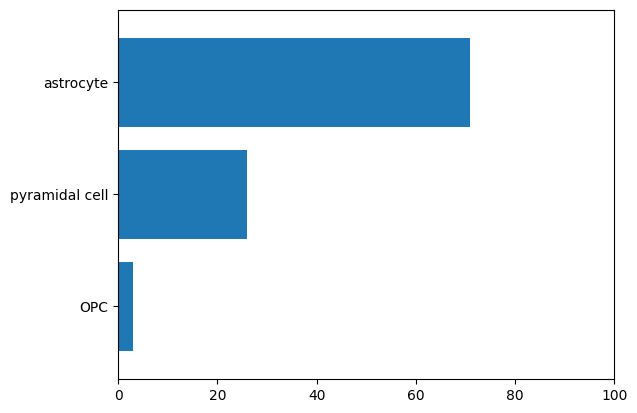

In [18]:
top100["cell_subtype"].value_counts().sort_values(ascending=True).plot.barh(width=0.8, xlim={0,100})

In [19]:
top100['cellid'].value_counts()

648518346349527319    9
648518346341354380    6
648518346349525715    5
648518346349517141    4
648518346349532924    4
648518346349490239    4
648518346349484948    3
648518346342807831    3
648518346349527317    3
648518346349536888    2
648518346341356348    2
648518346349508442    2
648518346342797245    2
648518346341392909    2
648518346349521062    2
648518346349528465    2
648518346349537741    2
648518346349537050    2
648518346349523306    2
648518346349528271    2
648518346349525544    2
648518346349516953    2
648518346349538089    2
648518346342917290    2
648518346349537901    1
648518346349536799    1
648518346349532180    1
648518346349525852    1
648518346349537853    1
648518346349537075    1
648518346349538475    1
648518346349539510    1
648518346349536811    1
648518346349538426    1
648518346349525753    1
648518346349538721    1
648518346349536924    1
648518346349539158    1
648518346349525571    1
648518346349539591    1
648518346349539891    1
6485183463495393

In [20]:
top = top100["cellid"] == 648518346349527319
topdf = top100.loc[top, ["cellid", "mito_id"]]
topdf

,cellid,mito_id
876164,648518346349527319,866030
876154,648518346349527319,1083380
876169,648518346349527319,854433
876155,648518346349527319,1083414
876190,648518346349527319,1083667
876172,648518346349527319,739489
876316,648518346349527319,1077732
876321,648518346349527319,961982
876166,648518346349527319,1304222


In [21]:
topdf["mito_id"].to_list()

[866030, 1083380, 854433, 1083414, 1083667, 739489, 1077732, 961982, 1304222]

In [22]:
top100_notastro = top100["cell_subtype"] != "astrocyte"
top100_notastrodf = top100.loc[top100_notastro, ["cellid", "mito_id", "mito_vx", "cell_type", "cell_subtype"]]
top100_notastrodf

,cellid,mito_id,mito_vx,cell_type,cell_subtype
879048,648518346349537741,2130887,15339984,pyramidal,pyramidal cell
840063,648518346349525545,2187341,14370188,glia,OPC
1073918,648518346349537611,964772,13126004,pyramidal,pyramidal cell
845857,648518346349538278,648935,11431944,pyramidal,pyramidal cell
836246,648518346349539934,682245,11391768,pyramidal,pyramidal cell
1006445,648518346349508442,2731334,10071300,glia,OPC
909100,648518346349537446,2899280,9949144,pyramidal,pyramidal cell
938565,648518346349539821,1344023,9852404,pyramidal,pyramidal cell
1044934,648518346349539376,2473233,9741668,pyramidal,pyramidal cell
879029,648518346349537741,2663999,9525800,pyramidal,pyramidal cell


# Create a dataframe of value counts by cellid

In [23]:
mito_counts = mito_novasc["cellid"].value_counts()
mito_counts

648518346349539215    3213
648518346349536888    3173
648518346349528994    2448
648518346349525715    2133
648518346349538791    2114
                      ... 
648518346349511899      40
648518346349528749      31
648518346341383616      21
648518346348199802      12
648518346342465191       4
Name: cellid, Length: 546, dtype: int64

In [24]:
mito_countsdf = mito_counts.to_frame("mito_count")
mito_countsdf

,mito_count
648518346349539215,3213
648518346349536888,3173
648518346349528994,2448
648518346349525715,2133
648518346349538791,2114
...,...
648518346349511899,40
648518346349528749,31
648518346341383616,21
648518346348199802,12


In [25]:
mitocounts = mito_countsdf.reset_index()

In [26]:
mitocounts

,index,mito_count
0,648518346349539215,3213
1,648518346349536888,3173
2,648518346349528994,2448
3,648518346349525715,2133
4,648518346349538791,2114
...,...,...
541,648518346349511899,40
542,648518346349528749,31
543,648518346341383616,21
544,648518346348199802,12


In [27]:
mitocounts.rename(columns = {'index':'cellid'}, inplace=True)

In [28]:
mitocounts

,cellid,mito_count
0,648518346349539215,3213
1,648518346349536888,3173
2,648518346349528994,2448
3,648518346349525715,2133
4,648518346349538791,2114
...,...,...
541,648518346349511899,40
542,648518346349528749,31
543,648518346341383616,21
544,648518346348199802,12


In [29]:
mitocounts.head(25)

,cellid,mito_count
0,648518346349539215,3213
1,648518346349536888,3173
2,648518346349528994,2448
3,648518346349525715,2133
4,648518346349538791,2114
5,648518346349517783,1877
6,648518346349539846,1863
7,648518346349532924,1744
8,648518346349536799,1735
9,648518346349516953,1609


In [30]:
mito_counts_celltype = pd.merge(mitocounts, celltype, how='inner', on = 'cellid')
mito_counts_celltype

,cellid,mito_count,Unnamed: 0,centroid_x,centroid_y,centroid_z,cell_type,cell_subtype
0,648518346349539215,3213,890,97248,56576,283,inhibitory,basket
1,648518346349536888,3173,24,104368,69440,1053,glia,astrocyte
2,648518346349528994,2448,107,86768,55856,1230,inhibitory,basket
3,648518346349525715,2133,52,75152,54848,2064,glia,astrocyte
4,648518346349538791,2114,929,55984,69200,2066,inhibitory,basket
...,...,...,...,...,...,...,...,...
541,648518346349511899,40,116,112112,67040,2170,pyramidal,pyramidal cell
542,648518346349528749,31,32,41840,66928,111,pyramidal,pyramidal cell
543,648518346341383616,21,99,43200,65072,2021,glia,unknown_type
544,648518346348199802,12,77,117776,48992,2098,glia,unknown_type


<AxesSubplot:>

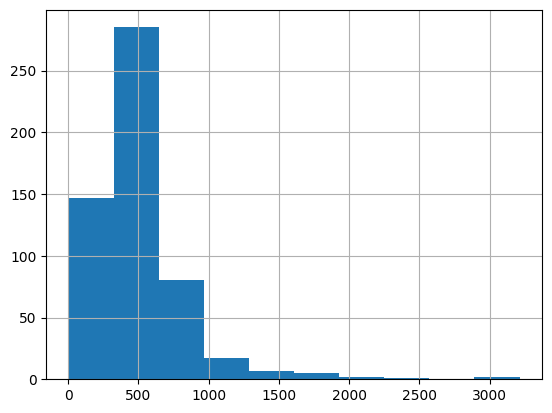

In [31]:
mito_counts_celltype["mito_count"].hist()

In [32]:
mito_counts_celltype.head(50)

,cellid,mito_count,Unnamed: 0,centroid_x,centroid_y,centroid_z,cell_type,cell_subtype
0,648518346349539215,3213,890,97248,56576,283,inhibitory,basket
1,648518346349536888,3173,24,104368,69440,1053,glia,astrocyte
2,648518346349528994,2448,107,86768,55856,1230,inhibitory,basket
3,648518346349525715,2133,52,75152,54848,2064,glia,astrocyte
4,648518346349538791,2114,929,55984,69200,2066,inhibitory,basket
5,648518346349517783,1877,616,85920,70832,683,inhibitory,unknown_type
6,648518346349539846,1863,668,60080,58736,1296,inhibitory,basket
7,648518346349532924,1744,58,106784,66352,1040,glia,astrocyte
8,648518346349536799,1735,4,72704,54688,506,glia,astrocyte
9,648518346349516953,1609,34,95568,48528,349,glia,astrocyte


In [33]:
mito_counts_pyr = mito_counts_celltype["cell_type"] == "pyramidal"
mito_counts_pyrdf = mito_counts_celltype.loc[mito_counts_pyr, ["cellid", "cell_type", "cell_subtype", "mito_count"]]
mito_counts_pyrdf

,cellid,cell_type,cell_subtype,mito_count
33,648518346349538440,pyramidal,pyramidal cell,969
34,648518346349539853,pyramidal,pyramidal cell,945
36,648518346349539900,pyramidal,pyramidal cell,902
37,648518346349533482,pyramidal,pyramidal cell,901
38,648518346349538527,pyramidal,pyramidal cell,871
...,...,...,...,...
537,648518346349493472,pyramidal,pyramidal cell,48
538,648518346349517132,pyramidal,pyramidal cell,48
540,648518346349493874,pyramidal,pyramidal cell,40
541,648518346349511899,pyramidal,pyramidal cell,40


In [34]:
mito_counts_glia = mito_counts_celltype["cell_type"] == "glia"
mito_counts_gliadf = mito_counts_celltype.loc[mito_counts_glia, ["cellid", "cell_type", "cell_subtype", "mito_count"]]
mito_counts_gliadf

,cellid,cell_type,cell_subtype,mito_count
1,648518346349536888,glia,astrocyte,3173
3,648518346349525715,glia,astrocyte,2133
7,648518346349532924,glia,astrocyte,1744
8,648518346349536799,glia,astrocyte,1735
9,648518346349516953,glia,astrocyte,1609
...,...,...,...,...
534,648518346349529797,glia,microglia,65
539,648518346349530654,glia,microglia,43
543,648518346341383616,glia,unknown_type,21
544,648518346348199802,glia,unknown_type,12


In [35]:
mito_counts_inhibitory = mito_counts_celltype["cell_type"] == "inhibitory"
mito_counts_inhibitorydf = mito_counts_celltype.loc[mito_counts_inhibitory, ["cellid", "cell_type", "cell_subtype", "mito_count"]]
mito_counts_inhibitorydf

,cellid,cell_type,cell_subtype,mito_count
0,648518346349539215,inhibitory,basket,3213
2,648518346349528994,inhibitory,basket,2448
4,648518346349538791,inhibitory,basket,2114
5,648518346349517783,inhibitory,unknown_type,1877
6,648518346349539846,inhibitory,basket,1863
14,648518346349538789,inhibitory,neurogliaform,1356
21,648518346349536849,inhibitory,unknown_type,1168
22,648518346349538638,inhibitory,chandelier,1114
25,648518346349538179,inhibitory,martinotti,1083
26,648518346349488919,inhibitory,unknown_type,1065


# Create a dataframe sorted by mito_vx and merged with cell type table

In [36]:
mito_voxelsdf = mito_novasc.sort_values(by='mito_vx', ascending=False)
mito_voxelsdf

,mito_id,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,...,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm,Unnamed: 0,centroid_x,centroid_y,centroid_z,cell_type,cell_subtype
876164,866030,100327168,64014,42198,1606,56972,36422,1335,69342,47894,...,648518346349527319,229170.12,151068.84,64240,61,61616,40400,1342,glia,astrocyte
842417,2526416,78158580,93642,61286,1787,86768,54870,1484,99966,66696,...,648518346341354380,335238.36,219403.88,71480,79,91392,59408,1702,glia,astrocyte
857922,3882596,75583848,115002,73240,1792,110136,69844,1469,119224,76370,...,648518346342795202,411707.16,262199.20,71680,88,115760,74992,1779,glia,astrocyte
927105,1607426,73260720,74412,73488,1986,69838,70410,1657,80624,76226,...,648518346349527317,266394.96,263087.04,79440,60,70544,74928,1998,glia,astrocyte
860788,1461550,66313908,73106,58042,1919,67040,54926,1527,76878,64996,...,648518346349525715,261719.48,207790.36,76760,52,75152,54848,2064,glia,astrocyte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916688,3448939,1200,103436,75908,669,103412,75888,668,103458,75928,...,648518346349539215,370300.88,271750.64,26760,890,97248,56576,283,inhibitory,basket
966071,1675825,1200,72304,49972,1255,72272,49962,1254,72344,49986,...,648518346349537913,258848.32,178899.76,50200,269,71600,48640,1236,pyramidal,pyramidal cell
14597,3414149,1200,102718,61806,895,102708,61788,891,102738,61830,...,648518346349536888,367730.44,221265.48,35800,24,104368,69440,1053,glia,astrocyte
1009267,971210,1200,59622,39932,1940,59606,39918,1939,59642,39948,...,648518346349539794,213446.76,142956.56,77600,885,58992,52704,1977,pyramidal,pyramidal cell


In [37]:
mito_voxels_celltype = pd.merge(mito_voxelsdf, celltype, how='inner', on = 'cellid')
mito_voxels_celltype

,mito_id,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,...,centroid_y_x,centroid_z_x,cell_type_x,cell_subtype_x,Unnamed: 0_y,centroid_x_y,centroid_y_y,centroid_z_y,cell_type_y,cell_subtype_y
0,866030,100327168,64014,42198,1606,56972,36422,1335,69342,47894,...,40400,1342,glia,astrocyte,61,61616,40400,1342,glia,astrocyte
1,1083380,42615580,67652,42956,1396,62308,39686,1076,73426,46952,...,40400,1342,glia,astrocyte,61,61616,40400,1342,glia,astrocyte
2,854433,26071428,60272,40094,1048,56888,39172,560,63680,41540,...,40400,1342,glia,astrocyte,61,61616,40400,1342,glia,astrocyte
3,1083414,16229984,64066,38346,1226,62378,36836,1121,68092,40178,...,40400,1342,glia,astrocyte,61,61616,40400,1342,glia,astrocyte
4,1083667,15729544,65638,39818,1190,62714,37810,1041,68520,41062,...,40400,1342,glia,astrocyte,61,61616,40400,1342,glia,astrocyte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279215,507871,1376,48694,72172,1447,48676,72152,1445,48714,72196,...,72688,1476,glia,microglia,3,49168,72688,1476,glia,microglia
279216,4336768,82180,119662,78272,1964,119582,78218,1944,119720,78340,...,78048,1952,glia,unknown_type,97,118800,78048,1952,glia,unknown_type
279217,4336669,25972,119380,78536,2061,119292,78484,2051,119468,78584,...,78048,1952,glia,unknown_type,97,118800,78048,1952,glia,unknown_type
279218,4336749,10408,119564,78248,1957,119532,78228,1950,119600,78274,...,78048,1952,glia,unknown_type,97,118800,78048,1952,glia,unknown_type


In [38]:
mito_voxels_pyr = mito_voxels_celltype["cell_type_x"] == "pyramidal"
mito_voxels_pyrdf = mito_voxels_celltype.loc[mito_voxels_pyr, ["cellid", "cell_type_x", "cell_subtype_x", "mito_vx"]]
mito_voxels_pyrdf

,cellid,cell_type_x,cell_subtype_x,mito_vx
20874,648518346349537741,pyramidal,pyramidal cell,15339984
20875,648518346349537741,pyramidal,pyramidal cell,9525800
20876,648518346349537741,pyramidal,pyramidal cell,6909740
20877,648518346349537741,pyramidal,pyramidal cell,5290628
20878,648518346349537741,pyramidal,pyramidal cell,4796936
...,...,...,...,...
279103,648518346349529960,pyramidal,pyramidal cell,4236
279104,648518346349529960,pyramidal,pyramidal cell,4188
279105,648518346349529960,pyramidal,pyramidal cell,3136
279106,648518346349529960,pyramidal,pyramidal cell,2596


In [39]:
mito_voxels_pyrdf.sort_values(by="mito_vx", ascending=False)

,cellid,cell_type_x,cell_subtype_x,mito_vx
20874,648518346349537741,pyramidal,pyramidal cell,15339984
26318,648518346349537611,pyramidal,pyramidal cell,13126004
27554,648518346349538278,pyramidal,pyramidal cell,11431944
28359,648518346349539934,pyramidal,pyramidal cell,11391768
32699,648518346349537446,pyramidal,pyramidal cell,9949144
...,...,...,...,...
116090,648518346349536966,pyramidal,pyramidal cell,1200
184401,648518346349538053,pyramidal,pyramidal cell,1200
188196,648518346349538787,pyramidal,pyramidal cell,1200
88292,648518346349539794,pyramidal,pyramidal cell,1200


<AxesSubplot:>

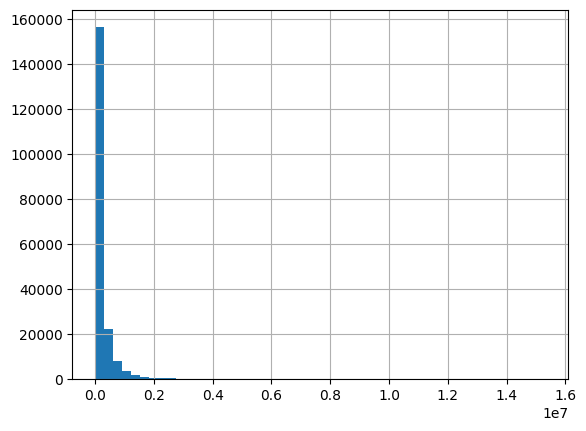

In [40]:
mito_voxels_pyrdf["mito_vx"].hist(bins=50)

In [41]:
mito_voxels_inh = mito_voxels_celltype["cell_type_x"] == "inhibitory"
mito_voxels_inhdf = mito_voxels_celltype.loc[mito_voxels_inh, ["cellid", "cell_type_x", "cell_subtype_x", "mito_vx"]]
mito_voxels_inhdf

,cellid,cell_type_x,cell_subtype_x,mito_vx
113111,648518346349538791,inhibitory,basket,4226588
113112,648518346349538791,inhibitory,basket,3476572
113113,648518346349538791,inhibitory,basket,2792524
113114,648518346349538791,inhibitory,basket,2736812
113115,648518346349538791,inhibitory,basket,2666956
...,...,...,...,...
278860,648518346349515986,inhibitory,bipolar,4344
278861,648518346349515986,inhibitory,bipolar,4156
278862,648518346349515986,inhibitory,bipolar,3604
278863,648518346349515986,inhibitory,bipolar,2072


In [42]:
mito_voxels_inhdf.sort_values(by="mito_vx", ascending=False)

,cellid,cell_type_x,cell_subtype_x,mito_vx
113111,648518346349538791,inhibitory,basket,4226588
123215,648518346349539215,inhibitory,basket,4013048
139167,648518346349528994,inhibitory,basket,3702596
144244,648518346349516051,inhibitory,chandelier,3658564
139168,648518346349528994,inhibitory,basket,3605784
...,...,...,...,...
126426,648518346349539215,inhibitory,basket,1208
259865,648518346349488919,inhibitory,unknown_type,1204
258800,648518346349525188,inhibitory,unknown_type,1204
265797,648518346349538789,inhibitory,neurogliaform,1204


<AxesSubplot:>

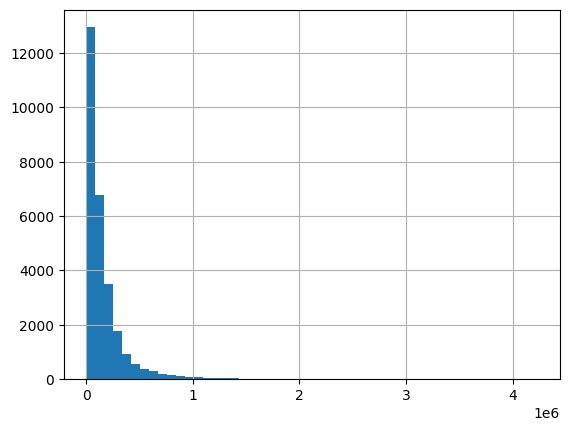

In [43]:
mito_voxels_inhdf["mito_vx"].hist(bins=50)

In [44]:
mito_voxels_glia = mito_voxels_celltype["cell_type_x"] == "glia"
mito_voxels_gliadf = mito_voxels_celltype.loc[mito_voxels_glia, ["cellid", "cell_type_x", "cell_subtype_x", "mito_vx"]]
mito_voxels_gliadf

,cellid,cell_type_x,cell_subtype_x,mito_vx
0,648518346349527319,glia,astrocyte,100327168
1,648518346349527319,glia,astrocyte,42615580
2,648518346349527319,glia,astrocyte,26071428
3,648518346349527319,glia,astrocyte,16229984
4,648518346349527319,glia,astrocyte,15729544
...,...,...,...,...
279215,648518346349530654,glia,microglia,1376
279216,648518346342465191,glia,unknown_type,82180
279217,648518346342465191,glia,unknown_type,25972
279218,648518346342465191,glia,unknown_type,10408


In [45]:
mito_voxels_gliadf.sort_values(by="mito_vx", ascending=False)

,cellid,cell_type_x,cell_subtype_x,mito_vx
0,648518346349527319,glia,astrocyte,100327168
868,648518346341354380,glia,astrocyte,78158580
1863,648518346342795202,glia,astrocyte,75583848
3142,648518346349527317,glia,astrocyte,73260720
3592,648518346349525715,glia,astrocyte,66313908
...,...,...,...,...
233381,648518346349517756,glia,microglia (perivascular),1200
237728,648518346349368699,glia,microglia,1200
52448,648518346349508722,glia,astrocyte,1200
52447,648518346349508722,glia,astrocyte,1200


In [46]:
mito_voxels_gliadf.sort_values(by="mito_vx", ascending=False).head(30)

,cellid,cell_type_x,cell_subtype_x,mito_vx
0,648518346349527319,glia,astrocyte,100327168
868,648518346341354380,glia,astrocyte,78158580
1863,648518346342795202,glia,astrocyte,75583848
3142,648518346349527317,glia,astrocyte,73260720
3592,648518346349525715,glia,astrocyte,66313908
5725,648518346342807831,glia,astrocyte,59419932
6706,648518346349538089,glia,astrocyte,47988028
8169,648518346349539158,glia,astrocyte,46629920
1,648518346349527319,glia,astrocyte,42615580
9451,648518346342917290,glia,astrocyte,40355360


<AxesSubplot:>

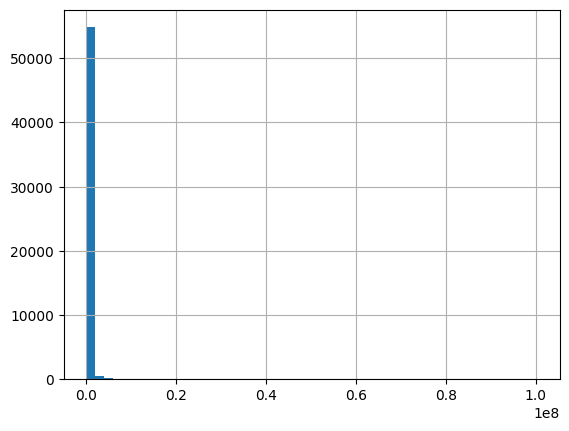

In [47]:
mito_voxels_gliadf["mito_vx"].hist(bins=50)

<AxesSubplot:xlabel='mito_vx', ylabel='Count'>

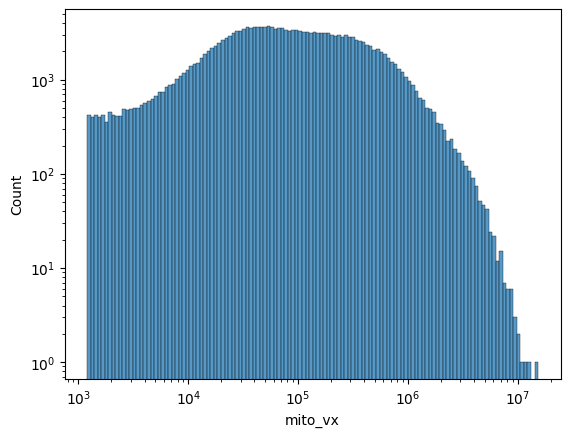

In [48]:
sns.histplot(data=mito_voxels_pyrdf, x="mito_vx", log_scale=(True,True))

<AxesSubplot:xlabel='mito_vx', ylabel='Count'>

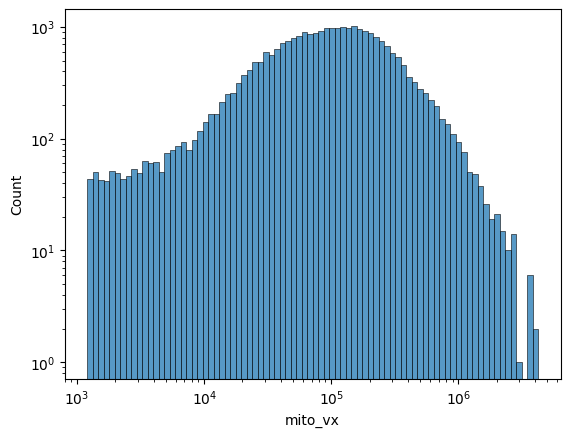

In [49]:
sns.histplot(data=mito_voxels_inhdf, x="mito_vx", log_scale=(True,True))

<AxesSubplot:xlabel='mito_vx', ylabel='Count'>

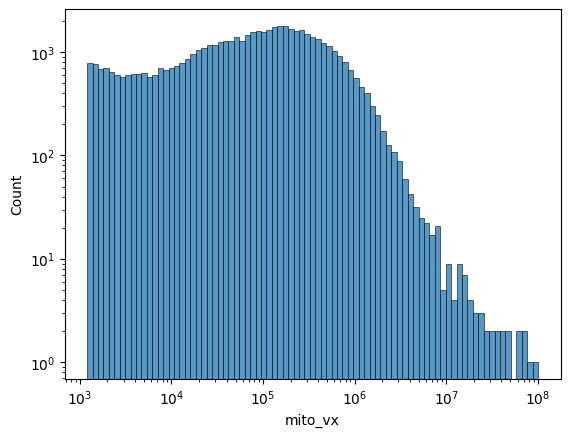

In [50]:
sns.histplot(data=mito_voxels_gliadf, x="mito_vx", log_scale=(True,True))